# Cell 0 — setup project root for imports

In [1]:

import sys, os

# go one level up from notebooks/ to project root
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

print("Project root added to sys.path:", project_root)


Project root added to sys.path: /Users/sajandeepsingh/Documents/GitHub/olist-project


Cell 1 — imports & engine

In [2]:
import pandas as pd
from config.db import get_engine
import matplotlib.pyplot as plt
import seaborn as sns

engine = get_engine()

Cell 2 — quick samples


In [3]:
orders = pd.read_sql('SELECT * FROM olist_orders_dataset LIMIT 10;', engine)
orders.head()

OperationalError: (pymysql.err.OperationalError) (1045, "Access denied for user 'root'@'localhost' (using password: NO)")
(Background on this error at: https://sqlalche.me/e/20/e3q8)

Cell 3 — distribution of order_status

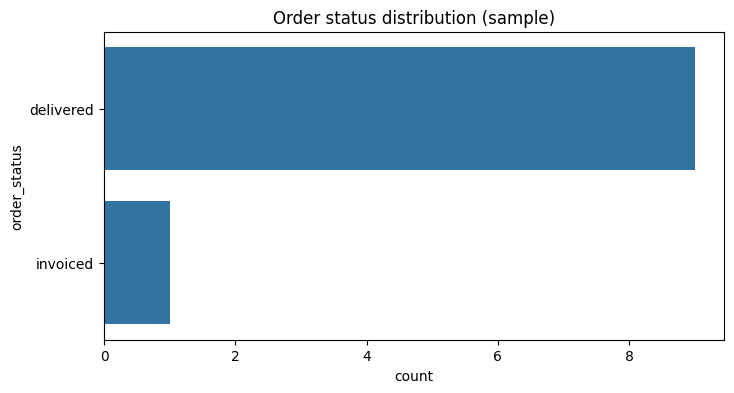

In [4]:
plt.figure(figsize=(8,4))
sns.countplot(y='order_status', data=orders, order=orders['order_status'].value_counts().index)
plt.title('Order status distribution (sample)')
plt.show()

Cell 4 — payments summary

In [5]:
payments = pd.read_sql('SELECT * FROM olist_order_payments_dataset LIMIT 20000;', engine)
payments['payment_value'].describe()

count    20000.000000
mean       153.718410
std        207.188488
min          0.000000
25%         57.167500
50%        100.000000
75%        173.332500
max       4764.340000
Name: payment_value, dtype: float64